# Airlines

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is ACC0-1167

 Directory of C:\Users\shand\Documents\Siddy\ExcelR\Assignment\Forecasting

09-02-2022  23:58    <DIR>          .
09-02-2022  04:44    <DIR>          ..
09-02-2022  23:58    <DIR>          .ipynb_checkpoints
09-02-2022  04:44             9,559 Airlines+Data.xlsx
09-02-2022  23:58           365,579 CocaCola.ipynb
09-02-2022  04:44             9,422 CocaCola_Sales_Rawdata.xlsx
09-02-2022  04:43               233 Problem_statement.txt
09-02-2022  23:58                72 Untitled.ipynb
               5 File(s)        384,865 bytes
               3 Dir(s)  208,055,390,208 bytes free


## Visualisation

In [3]:
airlines = pd.read_excel('Airlines+Data.xlsx')
airlines

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


### Line Plot

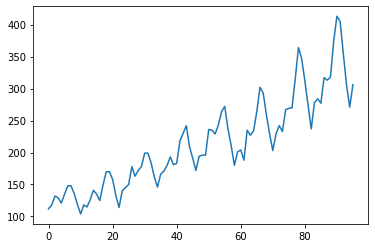

In [5]:
airlines.Passengers.plot()
plt.show()

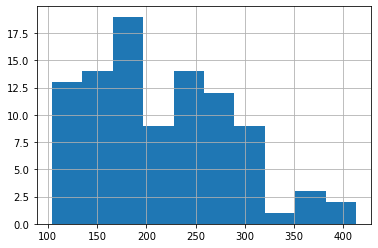

In [6]:
airlines.Passengers.hist()
plt.show()

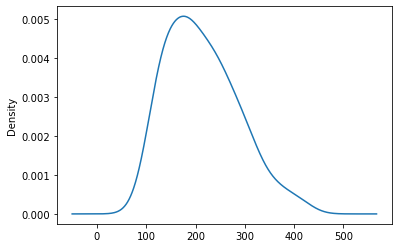

In [8]:
airlines.Passengers.plot(kind = 'kde')
plt.show()

### Lag Plot

<function matplotlib.pyplot.show(close=None, block=None)>

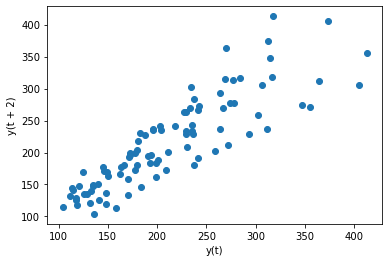

In [11]:
from pandas.plotting import lag_plot
lag_plot(airlines.Passengers, lag = 2)
plt.show

### ACF and PACF Plot

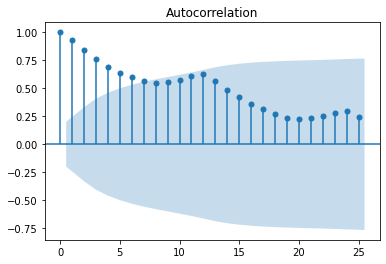

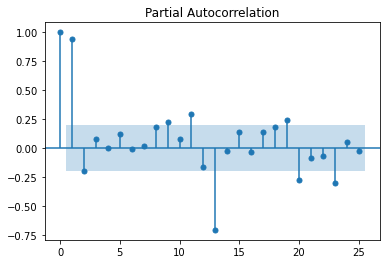

In [14]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(airlines.Passengers, lags = 25)
plt.show()
tsa_plots.plot_pacf(airlines.Passengers, lags = 25)
plt.show()

### Time Series Decomposition Plot

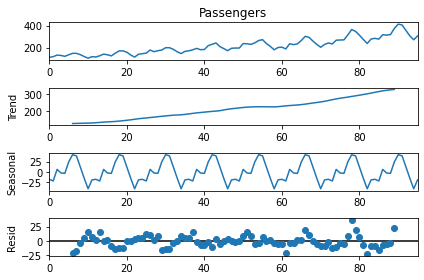

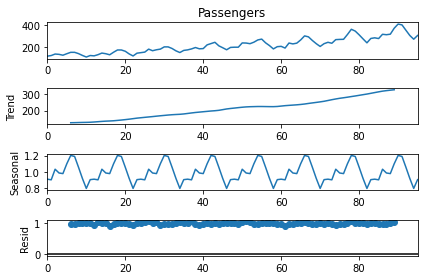

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(airlines.Passengers, period = 12, model = 'additive')
decompose_ts_add.plot()
plt.show()
decompose_ts_mul = seasonal_decompose(airlines.Passengers, period = 12, model = 'mul')
decompose_ts_mul.plot()
plt.show()

### Moving Average

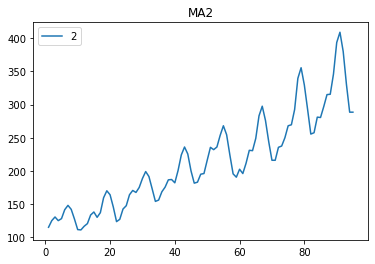

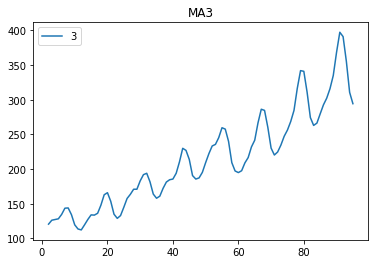

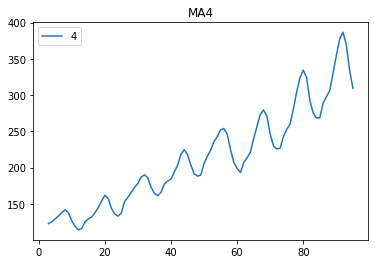

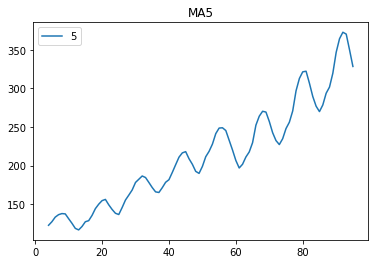

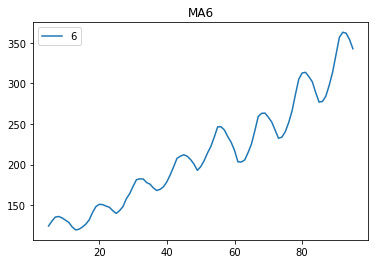

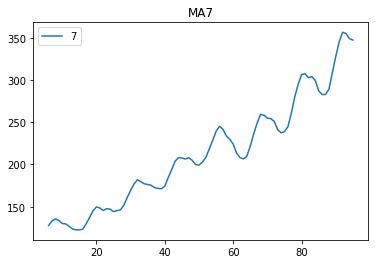

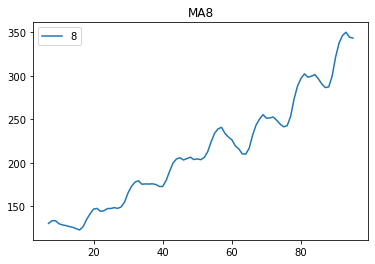

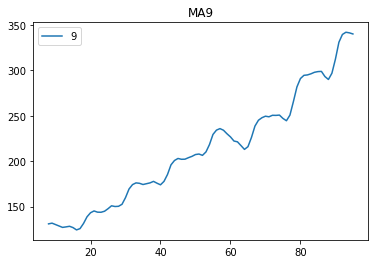

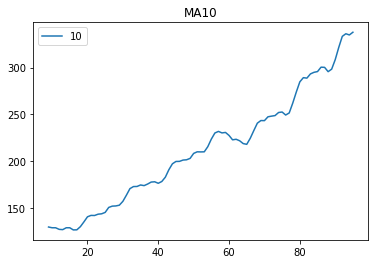

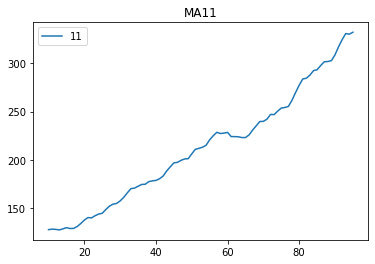

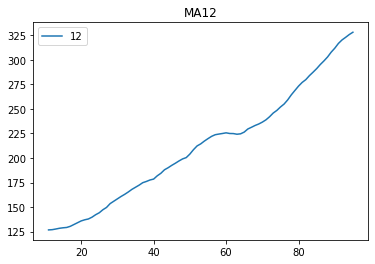

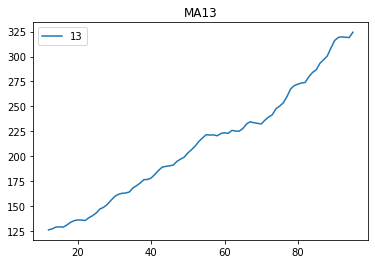

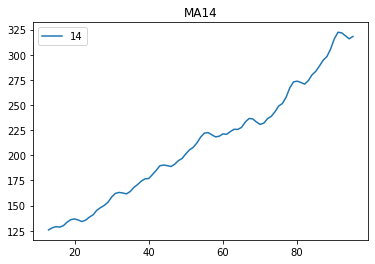

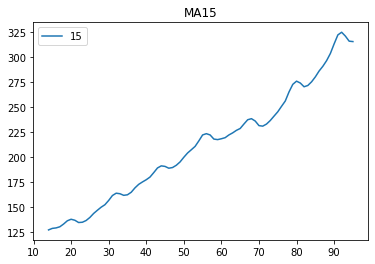

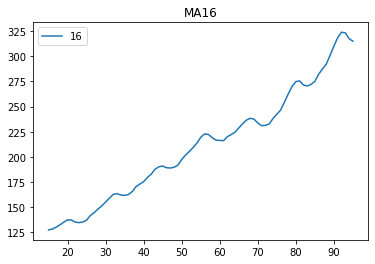

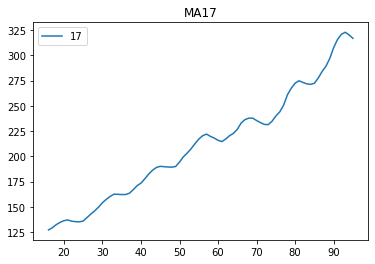

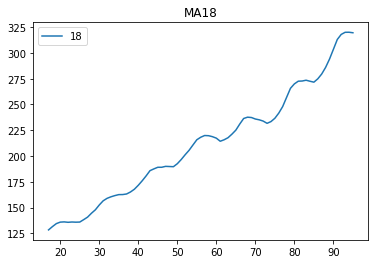

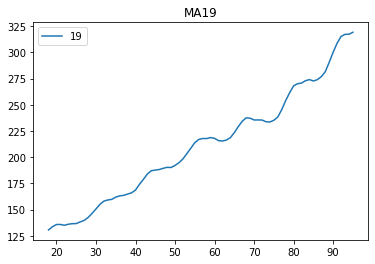

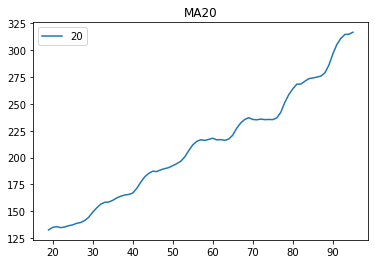

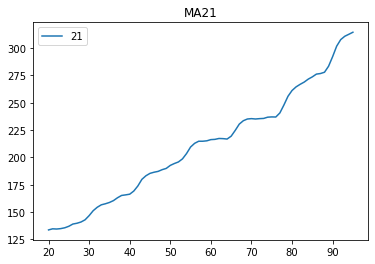

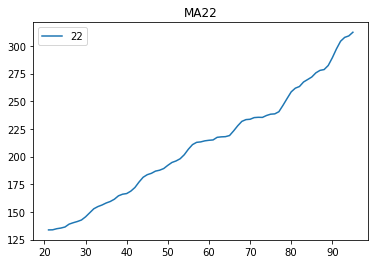

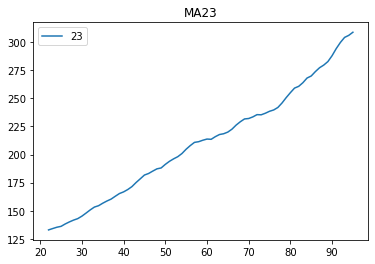

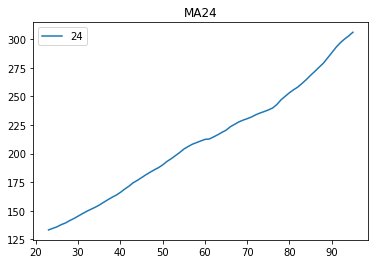

In [19]:
for i in range(2,25):
    airlines.Passengers.rolling(i).mean().plot(label = str(i))
    plt.title('MA' +str(i))
    plt.legend(loc = 'best')
    plt.show()

## Data Driven Models

In [20]:
# MAPE Score
def MAPE(pred, org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [21]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [22]:
train = airlines.head(76)
test = airlines.tail(20)

### Simple Exponential method

In [26]:
ses_model = SimpleExpSmoothing(train.Passengers).fit(smoothing_level = 0.2)
pred_ses = ses_model.predict(start = test.index[0], end = test.index[-1])
rmse_ses = np.sqrt(mean_squared_error(test.Passengers, pred_ses))
print('RMSE =', rmse_ses, 'MAPE =', MAPE(pred_ses, test.Passengers))

RMSE = 82.11594314672372 MAPE = 20.426622059557907


C:\Users\shand\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


### Holt method

In [27]:
hw_model = Holt(train.Passengers).fit(smoothing_level = 0.8, smoothing_trend = 0.2)
pred_hw = hw_model.predict(start = test.index[0], end = test.index[-1])
rmse_hw = np.sqrt(mean_squared_error(test.Passengers, pred_hw))
print('RMSE =', rmse_hw, 'MAPE =', MAPE(pred_hw, test.Passengers))

RMSE = 47.98872996523835 MAPE = 12.962869135424754


C:\Users\shand\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


### Holt Winter exponential smoothing with additive seasonality and additive trend

In [32]:
hwe_model_add_add = ExponentialSmoothing(train.Passengers, seasonal = 'add', trend = 'add', seasonal_periods = 12).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = test.index[0], end = test.index[-1])
rmse_hwe_add_add = np.sqrt(mean_squared_error(test.Passengers, pred_hwe))
print('RMSE =', rmse_hwe_add_add, 'MAPE =', MAPE(pred_hwe_add_add, test.Passengers))

RMSE = 37.73007966060939 MAPE = 8.723468117908276


C:\Users\shand\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


### Holt Winter exponential smoothing with multiplicative seasonality with additive trend

In [33]:
hwe_model_mul_add = ExponentialSmoothing(train.Passengers, seasonal = 'mul', trend = 'add', seasonal_periods = 12).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test.index[0], end = test.index[-1])
rmse_hwe_mul_add = np.sqrt(mean_squared_error(test.Passengers, pred_hwe_mul_add))
print('RMSE =', rmse_hwe_mul_add, 'MAPE =', MAPE(pred_hwe_mul_add, test.Passengers))

RMSE = 33.87795811066329 MAPE = 9.37552824015906


C:\Users\shand\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


## Final Model by combining train and test

In [36]:
hwe_model_add_add = ExponentialSmoothing(airlines.Passengers, seasonal = 'add', trend = 'add', seasonal_periods = 12).fit()

C:\Users\shand\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [37]:
hwe_model_add_add.forecast(10)

96     319.235281
97     311.528396
98     350.278697
99     346.984962
100    351.845000
101    403.925721
102    440.566848
103    427.446585
104    376.628288
105    329.767602
dtype: float64